In [1]:
# import libraries yang digunakan

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

In [2]:
data_insurance = pd.read_csv("insurance.csv")
data_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### 1. Analisa Deskriptif Stasistik
#### A. Rata-Rata Umur pada Data

In [3]:
# Mengambil data umur
data_age = (data_insurance["age"])

# Rata-rata umur
mean_age = data_age.mean()
print (f'Rata-rata umur: {mean_age:.3f}')

# Median umur
median_age = data_age.median()
print (f'Median umur: {median_age:.3f}')

Rata-rata umur: 39.207
Median umur: 39.000


Text(0.5, 1.0, 'Rata-Rata Umur')

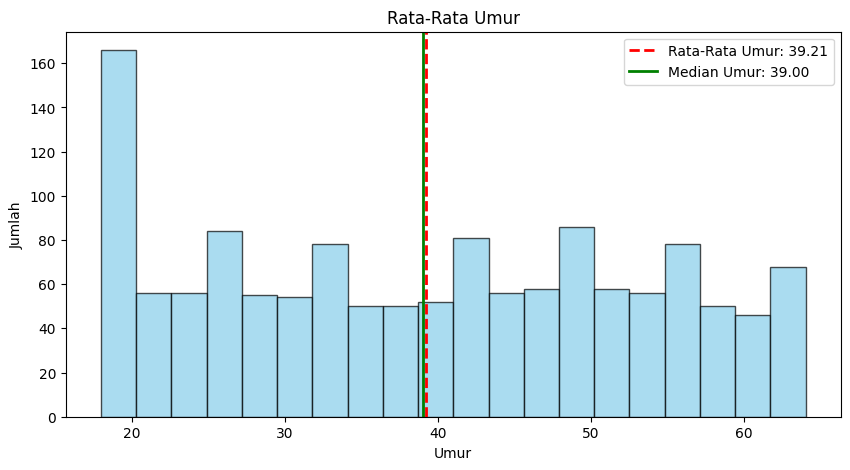

In [4]:
# Visualisasi Rata-Rata Tagihan Kesehatan Perokok & Non-Perokok

fig, (ax1) = plt.subplots(1, figsize=(10, 5), sharex= True, sharey=True)
# Histogram tagihan perokok
ax1.hist(data_age,
         bins=20,
         color='skyblue',
         edgecolor='black',
         alpha=0.7)

# Garis rata-rata pada tagihan perokok
ax1.axvline(mean_age,
           color='red',
           linestyle='dashed',
           linewidth=2,
           label=f'Rata-Rata Umur: {mean_age:.2f}')

#Garis median pada tagihan perokok
ax1.axvline(median_age,
            color='green',
            linestyle='solid',
            linewidth=2,
            label= f'Median Umur: {median_age:.2f}')

ax1.set_xlabel('Umur')
ax1.set_ylabel('Jumlah')
ax1.legend()
ax1.set_title('Rata-Rata Umur')


#### B. Rata-Rata Tagihan Kesehatan Perokok dan Non-Perokok

In [5]:
# Mengambil data tagihan (charges) pada perokok
charges_smoker = data_insurance[data_insurance.smoker == 'yes']['charges']

# Mengambil data tagihan (charges) pada non-perokok
charges_non_smoker = data_insurance[data_insurance.smoker == 'no']['charges']

# Menghitung rata-rata tagihan pada perokok
mean_charges_smoker = charges_smoker.mean()

# Menghitung median tagihan pada perokok
median_charges_smoker = charges_smoker.median()

# Menghitung rata-rata tagihan pada non-perokok
mean_charges_non_smoker = charges_non_smoker.mean()

# Menghitung median tagihan pada non-perokok
median_charges_non_smoker = charges_non_smoker.median()

In [6]:
# Cetak Hasil perhitungan
print (f'Rata-rata tagihan pada perokok: {mean_charges_smoker:.2f}')
print (f'Median tagihan pada perokok: {median_charges_smoker:.2f}')

print (f'Rata-rata tagihan pada non-perokok: {mean_charges_non_smoker:.2f}')
print (f'Median tagihan pada non-perokok: {median_charges_non_smoker:.2f}')

Rata-rata tagihan pada perokok: 32050.23
Median tagihan pada perokok: 34456.35
Rata-rata tagihan pada non-perokok: 8434.27
Median tagihan pada non-perokok: 7345.41


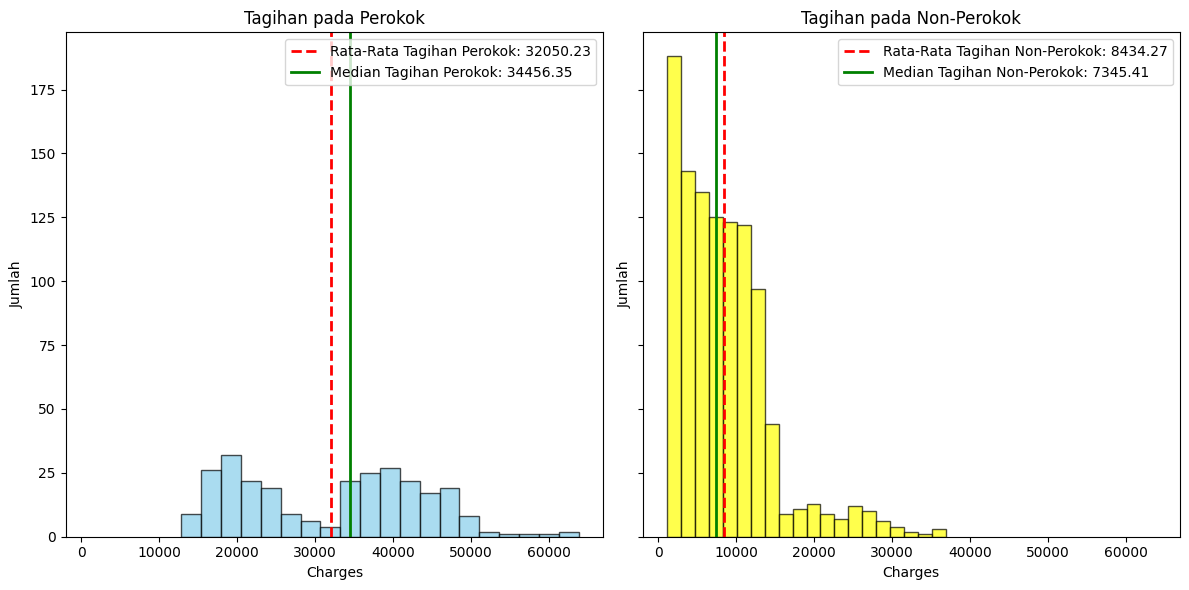

In [7]:
# Visualisasi Rata-Rata Tagihan Kesehatan Perokok & Non-Perokok

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex= True, sharey=True)

# Histogram tagihan perokok
ax1.hist(charges_smoker,
         bins=20,
         color='skyblue',
         edgecolor='black',
         alpha=0.7)

# Garis rata-rata pada tagihan perokok
ax1.axvline(mean_charges_smoker,
           color='red',
           linestyle='dashed',
           linewidth=2,
           label=f'Rata-Rata Tagihan Perokok: {mean_charges_smoker:.2f}')

#Garis median pada tagihan perokok
ax1.axvline(median_charges_smoker,
            color='green',
            linestyle='solid',
            linewidth=2,
            label= f'Median Tagihan Perokok: {median_charges_smoker:.2f}')

ax1.set_xlabel('Charges')
ax1.set_ylabel('Jumlah')
ax1.legend()
ax1.set_title('Tagihan pada Perokok')


# Histogram tagihan non-perokok
ax2.hist(charges_non_smoker,
         bins=20,
         color='yellow',
         edgecolor='black',
         alpha=0.7)

# Garis rata-rata pada tagihan non-perokok
ax2.axvline(mean_charges_non_smoker,
           color='red',
           linestyle='dashed',
           linewidth=2,
           label=f'Rata-Rata Tagihan Non-Perokok: {mean_charges_non_smoker:.2f}')

#Garis median pada tagihan non-perokok
ax2.axvline(median_charges_non_smoker,
            color='green',
            linestyle='solid',
            linewidth=2,
            label= f'Median Tagihan Non-Perokok: {median_charges_non_smoker:.2f}')

ax2.set_xlabel('Charges')
ax2.set_ylabel('Jumlah')
ax2.legend()
ax2.set_title('Tagihan pada Non-Perokok')

plt.tight_layout()
plt.show()


#### C. Variansi dari Tagihan Kesehatan Perokok dan Non-Perokok

In [8]:
# Mengambil data tagihan perokok
data_smoker = data_insurance[data_insurance.smoker == 'yes']['charges']

# Mengambil data tagihan non-perokok
data_non_smoker = data_insurance[data_insurance.smoker == 'no']['charges']

# menghitung variansi tagihan pada perokok
variansi_smoker = data_smoker.var()

#menghitung variansi tagihan pada non-perokok
variansi_non_smoker = data_non_smoker.var()

print (f'Variansi tagihan pada perokok: {variansi_smoker:.2f}')
print (f'Variansi tagihan pada non-perokok: {variansi_non_smoker:.2f}')

Variansi tagihan pada perokok: 133207311.21
Variansi tagihan pada non-perokok: 35925420.50


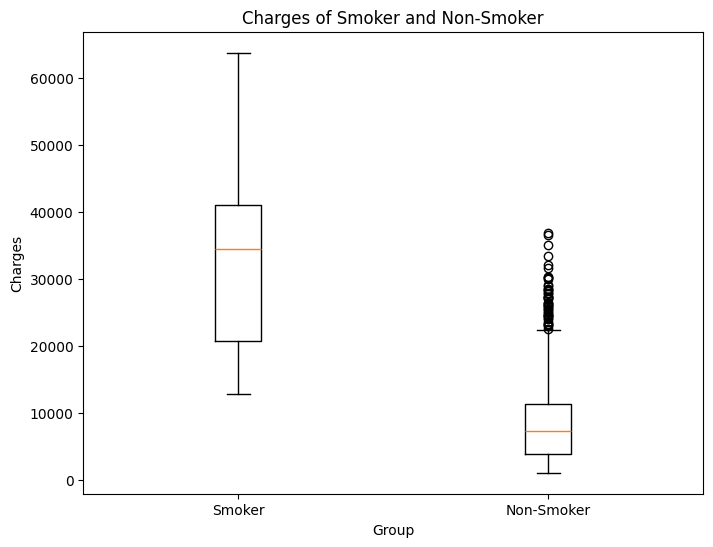

In [9]:
plt.figure(figsize=(8, 6))

# Membuat boxplot data perokok
plt.boxplot(data_smoker, positions=[1],
            labels=['Smoker'], sym='o')

# Boxplot data non-perokok
plt.boxplot(data_non_smoker, positions=[2],
            labels=['Non-Smoker'], sym='o')

plt.xlabel('Group')
plt.ylabel('Charges')
plt.title('Charges of Smoker and Non-Smoker')
plt.show()

#### D. Rata-Rata Nilai BMI pada Perokok

In [10]:
#Extract data BMI
bmi_smoker = (data_insurance[data_insurance['smoker']=='yes']["bmi"])

#calculate Mean
mean_bmi_smoker = bmi_smoker.mean()


#calculate median
median_bmi_smoker = bmi_smoker.median()

mean_bmi_smoker
median_bmi_smoker

print(f'Mean BMI Perokok: {mean_bmi_smoker:.2f}')
print (f'Median BMI perokok: {median_bmi_smoker:.2f}')

Mean BMI Perokok: 30.71
Median BMI perokok: 30.45


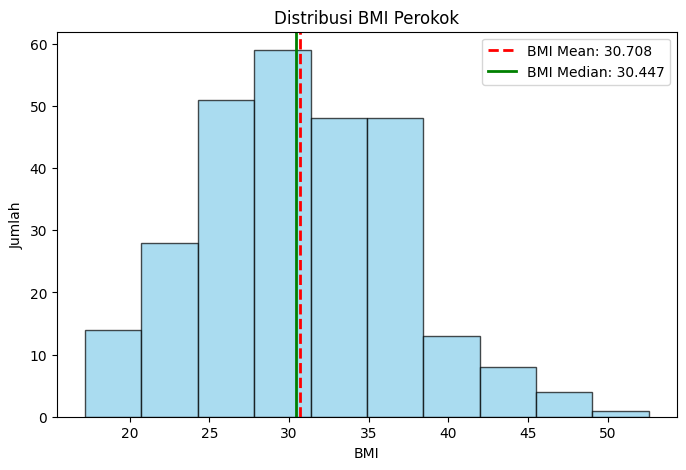

In [11]:
plt.figure(figsize=(8,5))

#create histogram
plt.hist(bmi_smoker, bins=10,
         color='skyblue',
         edgecolor='black',
         alpha=0.7)

#garis mean vertikal
plt.axvline(mean_bmi_smoker, color='red',
            linestyle='dashed', linewidth=2,
            label=f'BMI Mean: {mean_bmi_smoker:.3f}')

# garis median
plt.axvline(median_bmi_smoker, color='green',
            linestyle='solid', linewidth=2,
            label=f'BMI Median: {median_bmi_smoker:.3f}')


plt.xlabel('BMI')
plt.ylabel("Jumlah")
plt.legend()
plt.title('Distribusi BMI Perokok')
plt.show()


#### E. Rata-Rata Umur Perempuan dan Laki-Laki yang Merokok

In [12]:
# Mengambil data laki-laki yang merokok
male_smoker = data_insurance[(data_insurance.sex=='male') & (data_insurance.smoker=='yes')]

# Rata-rata usia laki-laki yang merokok
mean_age_male_smoker = male_smoker['age'].mean()

# Median usia laki-laki yang merokok
median_age_male_smoker = male_smoker['age'].median()

# Mengambil data perempuan yang merokok
female_smoker = data_insurance[(data_insurance.sex=='female') & (data_insurance.smoker=='yes')]

# Rata-rata usia perempuan yang merokok
mean_age_female_smoker = female_smoker['age'].mean()

# Median usia perempuan yang merokok
median_age_female_smoker = female_smoker['age'].median()

# Cetak Hasil perhitungan
print (f'Rata-rata usia laki-laki yang merokok: {mean_age_male_smoker:.2f}')
print (f'Median usia laki-laki yang merokok: {median_age_male_smoker:.2f}')

print (f'Rata-rata usia perempuan yang merokok: {mean_age_female_smoker:.2f}')
print (f'Median usia perempuan yang merokok: {median_age_female_smoker:.2f}')

Rata-rata usia laki-laki yang merokok: 38.45
Median usia laki-laki yang merokok: 38.00
Rata-rata usia perempuan yang merokok: 38.61
Median usia perempuan yang merokok: 39.00


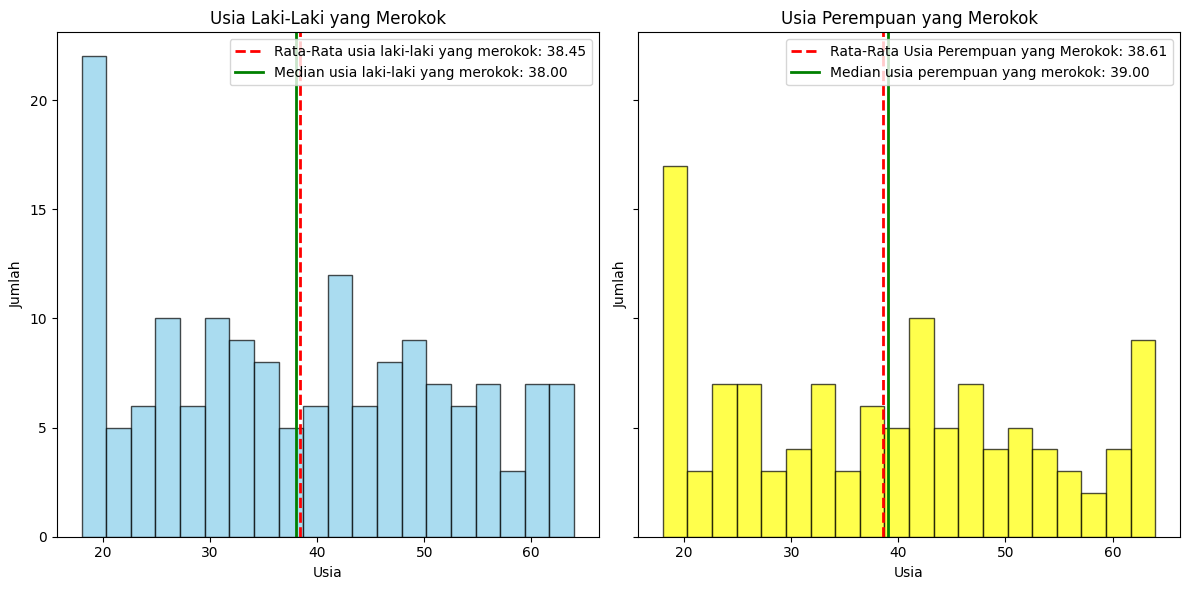

In [13]:
# Visualisasi rata-rata usia laki-laki dan perempuan yang merokok

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex= True, sharey=True)

# Histogram usia laki-laki yang merokok
ax1.hist(male_smoker['age'],
         bins=20,
         color='skyblue',
         edgecolor='black',
         alpha=0.7)

# Garis rata-rata usia laki-laki yang merokok
ax1.axvline(mean_age_male_smoker,
           color='red',
           linestyle='dashed',
           linewidth=2,
           label=f'Rata-Rata usia laki-laki yang merokok: {mean_age_male_smoker:.2f}')

#Garis median usia laki-laki yang merokok
ax1.axvline(median_age_male_smoker,
            color='green',
            linestyle='solid',
            linewidth=2,
            label= f'Median usia laki-laki yang merokok: {median_age_male_smoker:.2f}')

ax1.set_xlabel('Usia')
ax1.set_ylabel('Jumlah')
ax1.legend()
ax1.set_title('Usia Laki-Laki yang Merokok')


# Histogram usia perempuan yang merokok
ax2.hist(female_smoker['age'],
         bins=20,
         color='yellow',
         edgecolor='black',
         alpha=0.7)

# Garis rata-rata usia perempuan yang merokok
ax2.axvline(mean_age_female_smoker,
           color='red',
           linestyle='dashed',
           linewidth=2,
           label=f'Rata-Rata Usia Perempuan yang Merokok: {mean_age_female_smoker:.2f}')

#Garis median usia perempuan yang merokok
ax2.axvline(median_age_female_smoker,
            color='green',
            linestyle='solid',
            linewidth=2,
            label= f'Median usia perempuan yang merokok: {median_age_female_smoker:.2f}')

ax2.set_xlabel('Usia')
ax2.set_ylabel('Jumlah')
ax2.legend()
ax2.set_title('Usia Perempuan yang Merokok')

plt.tight_layout()
plt.show()


### 2. Analisis Variabel Diskrit
#### A. Peluang Seseorang Tersebut adalah Perempuan Diketahui Dia Adalah Perokok

In [14]:
# Menghitung perokok perempuan
female_smoker = data_insurance[(data_insurance.sex == 'female') & (data_insurance.smoker == 'yes')].shape[0]

# Menghitung total perokok
smoker = data_insurance[data_insurance.smoker == 'yes'].shape[0]

# Menghitung kemungkinan probalility perokok tersebut adalah perempuan
female_smoker_probability = female_smoker/smoker

print(f'Peluang seseorang perempuan diketahui dia perokok adalah {female_smoker_probability:.2f}')

Peluang seseorang perempuan diketahui dia perokok adalah 0.42


#### B. Peluang Seseorang Tersebut adalah Laki-Laki Diketahui Dia Adalah Perokok

In [15]:
# Menghitung perokok laki-laki
male_smoker = data_insurance[(data_insurance.sex == 'male') & (data_insurance.smoker == 'yes')].shape[0]


# Menghitung kemungkinan probalility perokok tersebut adalah laki-laki
male_smoker_probability = male_smoker/smoker

print(f'Peluang seseorang laki-laki diketahui dia perokok adalah {male_smoker_probability:.2f}')

Peluang seseorang laki-laki diketahui dia perokok adalah 0.58


#### C. Proporsi Data Banyak Orang yang Sama Setiap Region

In [16]:
# Menghitung total data di dataset
total_data = data_insurance.shape[0]

# menghitung data setiap region
region_counts = data_insurance['region'].value_counts()
print(region_counts)
print(f'Total data: {total_data:}')

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
Total data: 1338


In [17]:
# Menghitung propori tiap region
region_proportion = region_counts/total_data *100
region_proportion

region
southeast    27.204783
southwest    24.289985
northwest    24.289985
northeast    24.215247
Name: count, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

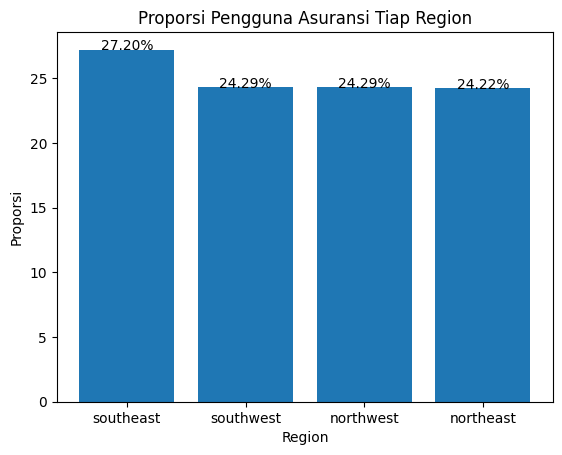

In [18]:
# Visualisasi proporsi tiap region
plt.bar(region_proportion.index, region_proportion.values)

for i, proportion in enumerate(region_proportion):
    plt.text(i, proportion + 0.001, f'{proportion:.2f}%',
             ha= 'center', fontsize= 10)

plt.title('Proporsi Pengguna Asuransi Tiap Region')
plt.xlabel('Region')
plt.ylabel("Proporsi")

plt.show


#### D. Gender yang Memiliki Tagihan Paling Tinggi


In [19]:
# Mengambil Data Tagihan Pada Laki-Laki
male_charges = data_insurance[data_insurance.sex=='male']["charges"]

# Menghitung Mean dan Median Tagihan Laki-Laki
mean_male_charges = male_charges.mean()
median_male_charges = male_charges.median()

# Mengambil Data Tagihan Pada Perempuan
female_charges = data_insurance[data_insurance.sex=='female']["charges"]

# Menghitung Mean dan Median Tagihan Perempuan
mean_female_charges = female_charges.mean()
median_female_charges = female_charges.median()


print (f'Rata-rata tagihan pada kelompok laki-laki: {mean_male_charges:.2f}')
print (f'Median tagihan pada kelompok laki-laki: {median_male_charges:.2f}')

print (f'Rata-rata tagihan pada kelompok perempuan: {mean_female_charges:.2f}')
print (f'Median tagihan pada kelompok perempuan: {median_female_charges:.2f}')

Rata-rata tagihan pada kelompok laki-laki: 13956.75
Median tagihan pada kelompok laki-laki: 9369.62
Rata-rata tagihan pada kelompok perempuan: 12569.58
Median tagihan pada kelompok perempuan: 9412.96


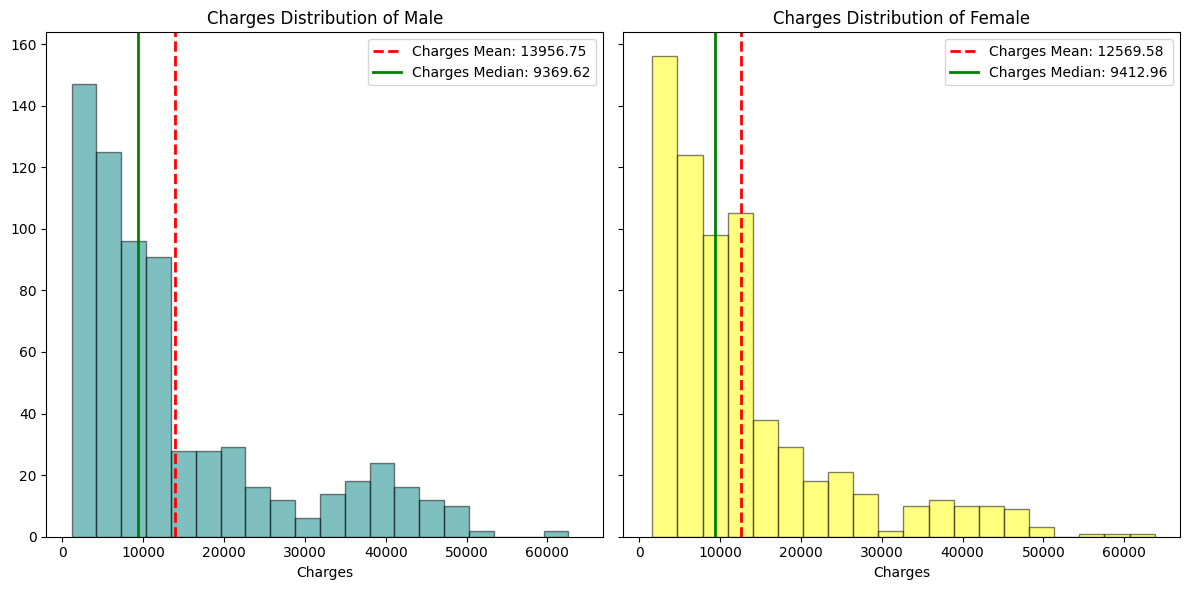

In [20]:
# Visualisasi Gender yang memiliki tagihan paling tinggi
fig, (ax1, ax2) = plt.subplots(1, 2, 
                              figsize=(12, 6), 
                              sharex= True,
                              sharey = True)

# Histogram tagihan laki-laki
ax1.hist(male_charges,
         bins=20,
         alpha=0.5,
         color='teal',
         edgecolor='black')

# Menambahkan garis mean & median
ax1.axvline(mean_male_charges,
            color='red',
            linestyle='dashed',
            linewidth=2,
            label=f'Charges Mean: {mean_male_charges:.2f}')

ax1.axvline(median_male_charges,
            color='green',
            linestyle='solid',
            linewidth=2,
            label=f'Charges Median: {median_male_charges:.2f}')

ax1.set_xlabel('Charges')
ax1.legend()
ax1.set_title('Charges Distribution of Male')


# Histogram tagihan perempuan
ax2.hist(female_charges,
         bins=20,
         alpha=0.5,
         color='yellow',
         edgecolor='black')

# Menambahkan garis mean & median
ax2.axvline(mean_female_charges,
            color='red',
            linestyle='dashed',
            linewidth=2,
            label=f'Charges Mean: {mean_female_charges:.2f}')

ax2.axvline(median_female_charges,
            color='green',
            linestyle='solid',
            linewidth=2,
            label=f'Charges Median: {median_female_charges:.2f}')

ax2.set_xlabel('Charges')
ax2.legend()
ax2.set_title('Charges Distribution of Female')


plt.tight_layout()
plt.show()

#### E. Proporsi Perokok dan Non-Perokok

In [21]:
# Menghitung jumlah perokok dan non-perokok
smoker_count = data_insurance['smoker'].value_counts()
smoker_count

smoker
no     1064
yes     274
Name: count, dtype: int64

In [22]:
# Proporsi Perokok dan Non-Perokok
smoker_proportions = smoker_count / total_data * 100
smoker_proportions

smoker
no     79.521674
yes    20.478326
Name: count, dtype: float64

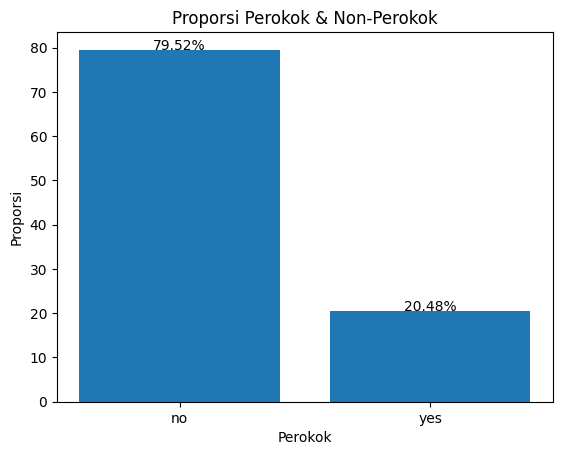

In [23]:
# Visualisasi Proporsi Perokok & Non-Perokok
plt.bar(smoker_proportions.index, smoker_proportions.values)

for i, proportion in enumerate(smoker_proportions):
    plt.text(i, proportion + 0.001, f'{proportion:.2f}%',
             ha= 'center', fontsize= 10)

plt.title('Proporsi Perokok & Non-Perokok')
plt.xlabel('Perokok')
plt.ylabel("Proporsi")

plt.show()

### 3. Analisa Variabel Kontinu
1. Mana yang lebih mungkin terjadi:
   * Seseorang dengan **BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7K,** _atau_
   * Seseorang dengan **BMI di bawah 25 mendapatkan tagihan kesehatan di atas 16.7%.**


In [24]:
# Mengambil data dengan BMI > 25
diatas_25 = data_insurance[data_insurance['bmi'] > 25]

# Menghitung kemungkinan seseorang dengan BMI > 25 mendapatkan tagihan di atas 16.7K
probability_diatas_25 = len(diatas_25[diatas_25['charges'] > 16700]) / len(diatas_25)

# Mengambil data dengan BMI <= 25
dibawah_25 = data_insurance[data_insurance['bmi'] <= 25]

# Menghitung kemungkinan seseorang dengan BMI < 25 mendapatkan tagihan di atas 16.7K
probability_dibawah_25 = len(dibawah_25[dibawah_25['charges'] > 16700]) / len(dibawah_25)

print(f'Peluang seseorang dengan BMI di atas 25 mendapatkan tagihan di atas 16.7 adalah: {probability_diatas_25:.2f}')
print(f'Peluang seseorang dengan BMI di bawah 25 mendapatkan tagihan di atas 16.7 adalah: {probability_dibawah_25:.2f}')

Peluang seseorang dengan BMI di atas 25 mendapatkan tagihan di atas 16.7 adalah: 0.26
Peluang seseorang dengan BMI di bawah 25 mendapatkan tagihan di atas 16.7 adalah: 0.21


2. Mana yang lebih mungkin terjadi:
   * Seseorang perokok dengan **BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7K,** _atau_
   * Seseorang non-perokok dengan **BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7%.**

In [25]:
# Memilih data perokok dengan BMI > 25
smoker_25 = data_insurance[(data_insurance['smoker'] == 'yes') & (data_insurance['bmi'] > 25)]

# Menghitung kemungkinan perokok dengan BMI di atas 25 mendapatkan tagihan di atas 16.7K
probabality_charges_smoker_25 = (len(smoker_25[smoker_25['charges'] > 16700]) / len(smoker_25))

# Memilih data non-perokok dengan BMI > 25
non_smoker_25 = data_insurance[(data_insurance['smoker'] == 'no') & (data_insurance['bmi'] > 25)]

# Menghitung kemungkinan perokok dengan BMI di atas 25 mendapatkan tagihan di atas 16.7K
probabality_charges_non_smoker_25 = (len(non_smoker_25[non_smoker_25['charges'] > 16700]) / len(non_smoker_25))

print(f'Peluang seseorang perokok dengan BMI di atas 25 mendapatkan tagihan di atas 16.7 adalah: {probabality_charges_smoker_25:.2f}')
print(f'Peluang seseorang non-perokok dengan BMI di atas 25 mendapatkan tagihan di atas 16.7 adalah: {probabality_charges_non_smoker_25:.2f}')

Peluang seseorang perokok dengan BMI di atas 25 mendapatkan tagihan di atas 16.7 adalah: 0.98
Peluang seseorang non-perokok dengan BMI di atas 25 mendapatkan tagihan di atas 16.7 adalah: 0.08


#### 4. Analisa Korelasi Dua Variabel

In [26]:
# Menghitung korelasi Age, BMI, Children, dan Charges

cov_matrix = data_insurance[['age', 'bmi', 'children', 'charges']].cov()

print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
                   age           bmi    children       charges
age         197.401387      9.362337    0.719303  5.087480e+04
bmi           9.362337     37.187884    0.093795  1.464730e+04
children      0.719303      0.093795    1.453213  9.926742e+02
charges   50874.802298  14647.304426  992.674197  1.466524e+08


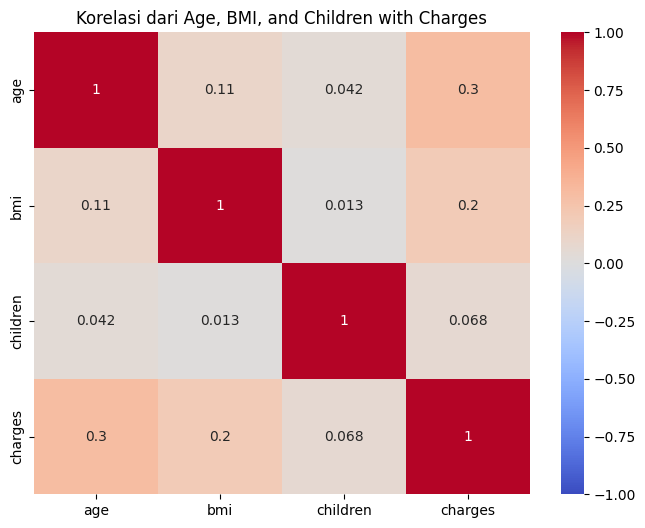

In [27]:
# Menghitung korelasi 
corr_matrix = data_insurance[['age', 'bmi', 'children', 'charges']].corr()

# Membuat heatmap untuk visualisasi korelasi
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,
            annot=True, 
            cmap='coolwarm',
            vmin=-1, vmax=1)

plt.title('Korelasi dari Age, BMI, and Children with Charges')
plt.show()



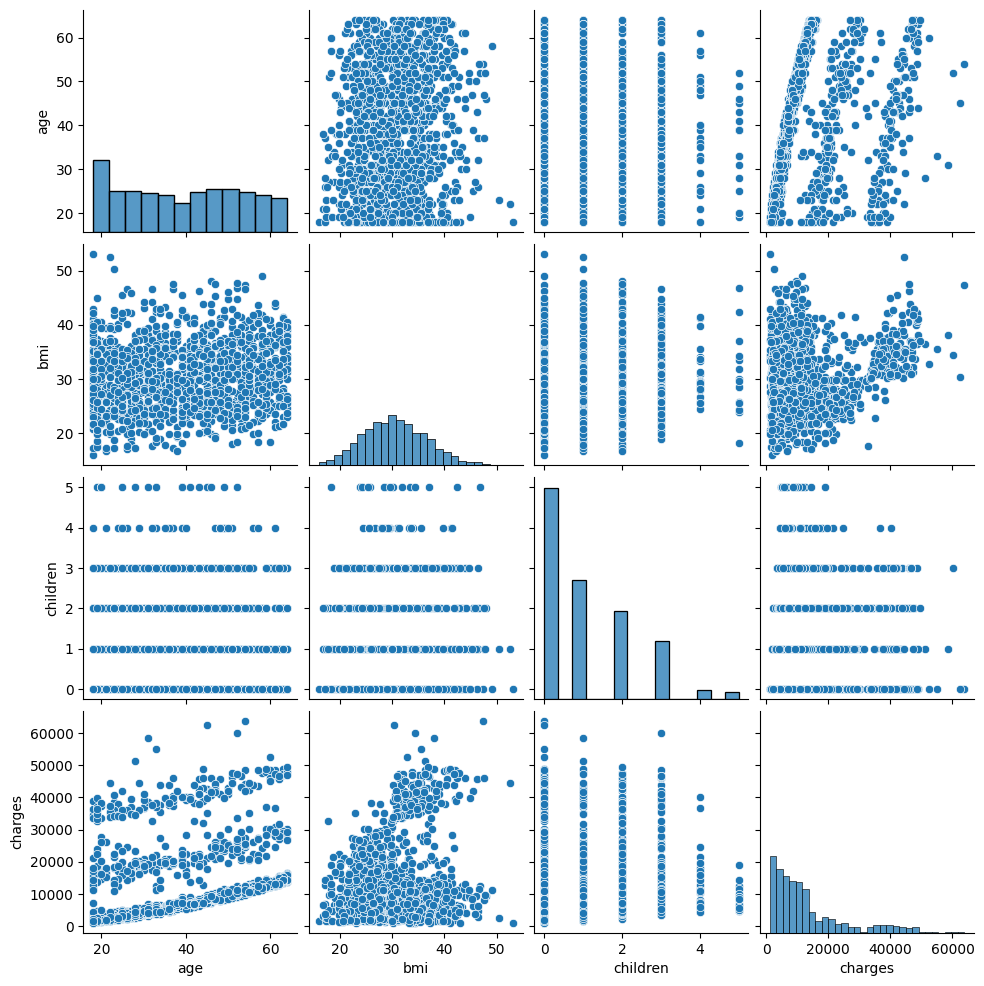

In [28]:
# create pairplot
sns.pairplot(data_insurance[['age', 'bmi', 'children', 'charges']])

### **5. Pengujian Hipotesis**

#### A. Tagihan Kesehatan Perokok Lebih Tinggi daripada Tagihan Kesehatan Non-Perokok

H0 : Perokok <= non-perokok\
H1 : Perokok > non-perokok

In [29]:
alpha = 0.05

# Memilih tagihan kesehatan pada perokok dan non-perokok
charges_smoker = data_insurance[data_insurance['smoker'] == 'yes']['charges']
charges_non_smoker = data_insurance[data_insurance['smoker'] == 'no']['charges']

# Menghitung variance tagihan pada perokok dan non-perokok
np.var(charges_smoker), np.var(charges_non_smoker)

(132721153.13625307, 35891656.00316426)

In [30]:
# Independent dua sampel t-test dengan unequal variances
stat, p = ttest_ind(a = charges_smoker, b = charges_non_smoker,
                    equal_var = False,
                    alternative = 'greater')

print(f'Statistics = {stat}, p-value = {p}')

Statistics = 32.751887766341824, p-value = 2.94473222335849e-103


In [31]:
# Mengecek jika p-value lebih kecil dari alpha
if p < alpha:
    print('TOLAK H0')
else:
    print("GAGAL TOLAK H0")

TOLAK H0


#### B. Proporsi Perokok Laki-Laki Lebih Besar dari Perempuan

p1 = perokok laki-laki\
p2 = perokok perempuan\
H0 : p1 <= p2\
H1 : p1 > p2

In [32]:
alpha = 0.05

# Menghitung jumlah perempuan dan laki-laki
total_male = data_insurance[data_insurance.sex == 'male'].shape[0]
total_female = data_insurance[data_insurance.sex == 'female'].shape[0]


# Membuat array jumlah perokok dan total sample
number_of_smoker = np.array([male_smoker, female_smoker])
total_sample_sizes = np.array([total_male, total_female])

In [33]:
# Z test untuk membandingkan proporsi perokok laki-laki dan perempuan
(test_stat, p_value) = proportions_ztest(number_of_smoker,
                                         total_sample_sizes,
                                         alternative ='larger')

print("Uji statistik: ", test_stat)
print("p-value: ", p_value)

Uji statistik:  2.7867402154855503
p-value:  0.002662057082160266


In [34]:
# pengujian hipotesis
if p_value < alpha:
    print('Tolak H0')
else:
    print("Gagal Tolak H0")

Tolak H0


In [35]:
# Menghitung critical value (z_crit)
z_crit = stats.norm._ppf(1-0.05)

print(z_crit)

1.6448536269514722


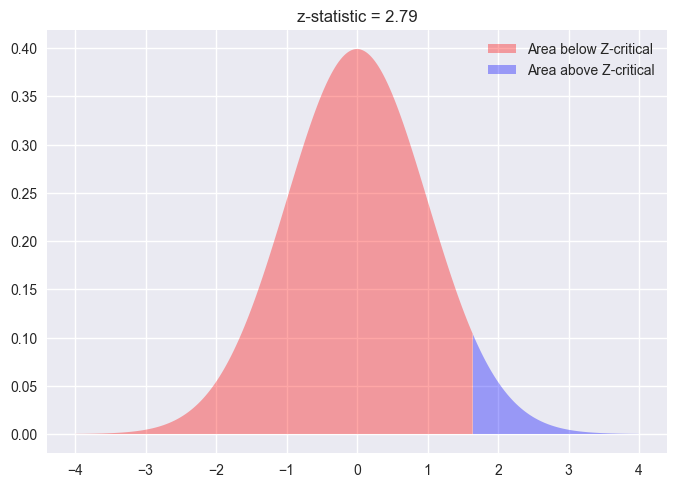

In [36]:
# Visualisasi critical regions
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

plt.fill_between(x=np.arange(-4,z_crit,0.01),
                 y1= stats.norm.pdf(np.arange(-4,z_crit,0.01)),
                 facecolor ='red',
                 alpha = 0.35,
                 label = 'Area below Z-critical'
                 )

plt.fill_between(x=np.arange(z_crit,4,0.01),
                 y1= stats.norm.pdf(np.arange(z_crit,4,0.01)),
                 facecolor = 'blue',
                 alpha = 0.35,
                 label='Area above Z-critical'
                 )

plt.legend()
plt.title (f"z-statistic = {test_stat:.2f}");

In [37]:
# Pengujian Hipotesis
if test_stat > z_crit:
    print('Tolak H0')
else:
    print('Gagal Tolak H0')

Tolak H0


#### C. Tagihan Kesehatan dengan BMI di Atas 25 Lebih Tinggi daripada Tagihan Kesehatan dengan BMI di Bawah 25

In [38]:
alpha = 0.05

# Data tagihan seseorang dengan BMI di atas 25 dan di bawah 25
charges_above_25 = data_insurance[data_insurance['bmi'] > 25]['charges']
charges_under_25 = data_insurance[data_insurance['bmi'] < 25]['charges']

# Variance tagihan untuk seseorang di atas 25 dan di bawah 25
np.var(charges_above_25), np.var(charges_under_25)

(164579189.52132663, 56326859.63068616)

In [39]:
# t-test dengan unequal variance
stat, p = ttest_ind(a = charges_above_25,
                    b = charges_under_25,
                    equal_var= False,
                    alternative= 'greater')

print(f'Statistic = {stat}, p_value = {p}')

Statistic = 5.929878344096734, p_value = 2.540448651580689e-09


In [40]:
# Pengujian Hipotesis
if p < alpha:
    print('Tolak H0')
else:
    print("Gagal Tolak H0")

Tolak H0
